In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pickle as pk
from skimage import io
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import torch
#torch.cuda.get_device_name(0)

In [2]:
!gdown --id 1752sGS4N_LRusxVSkiopZDCeQPSC94bz
!unzip stats.zip
!gdown --id 1NfYwSSOdc4od2TrRZZiw8QvPq2PIsyL3
!unzip default.zip

Streaming output truncated to the last 5000 lines.
  inflating: default/part9/id-VuFaJV0SGg_video.jpg  
  inflating: default/part9/id-VugbTELJKo_video.jpg  
  inflating: default/part9/id-VuGknBJV4c_video.jpg  
  inflating: default/part9/id-VUGo5fSOdI_video.jpg  
  inflating: default/part9/id-VUGX6KUkNo_video.jpg  
  inflating: default/part9/id-vuHBxSaoRU_video.jpg  
  inflating: default/part9/id-vuHDd6HpjU_video.jpg  
  inflating: default/part9/id-vUHNUpWOUA_video.jpg  
  inflating: default/part9/id-VUiCMK8bYg_video.jpg  
 extracting: default/part9/id-vuIrF1CwSo_video.jpg  
  inflating: default/part9/id-VUIsAMeQYg_video.jpg  
  inflating: default/part9/id-vUItIZ9HHM_video.jpg  
  inflating: default/part9/id-VuIZKYj6q8_video.jpg  
  inflating: default/part9/id-vuJ8MoYGAk_video.jpg  
  inflating: default/part9/id-vukpnEiZ8E_video.jpg  
  inflating: default/part9/id-vulZ2VXUd4_video.jpg  
  inflating: default/part9/id-VuMeQdGATM_video.jpg  
  inflating: default/part9/id-VUmKzADFG0_video.j

In [3]:
#podemos revisar previamente para ver cuantas imagenes del tamaño correcto
#existen en cada parte


[0, 8816, 17658, 26456, 35293, 44107]
[8816, 8842, 8798, 8837, 8814]
0
10
10
10
10
10
1
10
10
10
10
10
2
10
10
10
10
10
3
10
10
10
10
10
4
10
10
10
10
10
views de 0  3543
tipo de views 0 <class 'str'>
Len train images 50
[['/m/04rlf', '/m/04rlf'], ['/m/098wr', '/m/098wr'], ['/m/04rlf', '/m/064t9'], ['/m/0bzvm2', '/m/0bzvm2'], ['/m/0bzvm2', '/m/0bzvm2', '/m/0403l3g'], ['/m/01h6rj', '/m/04rlf', '/m/04rlf'], ['/m/07yv9', '/m/0410tth', '/m/019_rr', '/m/019_rr', '/m/07yv9', '/m/0410tth'], ['/m/019_rr', '/m/019_rr', '/m/03glg'], ['/m/02jjt', '/m/02jjt', '/m/02vxn'], ['/m/019_rr', '/m/019_rr', '/m/03glg'], ['/m/02wbm', '/m/019_rr', '/m/019_rr', '/m/02wbm'], ['/m/02jjt', '/m/02jjt'], ['/m/025zzc', '/m/0bzvm2', '/m/0bzvm2', '/m/025zzc'], ['/m/019_rr', '/m/019_rr', '/m/07c1v'], ['/m/04rlf'], ['/m/019_rr', '/m/019_rr', '/m/07yv9'], ['/m/04rlf', '/m/02lkt', '/m/04rlf', '/m/02lkt'], ['/m/02vx4', '/m/06ntj', '/m/06ntj', '/m/02vx4'], ['/m/07yv9', '/m/019_rr', '/m/019_rr', '/m/07yv9'], ['/m/04rlf'], [

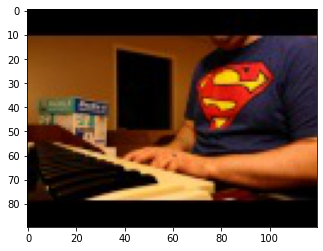

In [5]:
#definimos la cantidad de imagenes que queremos por categoria para entrenar
maxTrainCount = 10
partsToUse = 5

#imgIDs, views, likes, dislikes, comments = []
imgIDs = []
views = []
trainImages = []
trainLabels = []
topicIds = []
partSize = []
offsetSize = []

offsetSize.append(0)

for i in range(partsToUse):
  auxImgIDs, auxViews, auxLikes, auxDislikes, auxComments, auxTopicIds = pk.load(open("./stats/part" + str(i+1) + ".pickle", "rb"))
  imgIDs += auxImgIDs
  views += auxViews
  topicIds += auxTopicIds
  offsetSize.append(len(imgIDs))
  partSize.append(len(auxImgIDs))
  
print(offsetSize)
print(partSize)

  #print("unpickle","./stats/part",str(i+1),".pickle")

#auxImage = io.imread("part" + str(i) +  "/" + imgIDs[i + partSize[j]] + ".jpg")

j = 0
num0s = 0
num1s = 0
num2s = 0
num3s = 0
num4s = 0

while (j < 5):
  print(j)
  for i in range(partSize[j]):
    auxImage = io.imread("default/part" + str(j+1) +  "/" + imgIDs[i + offsetSize[j]] + ".jpg")
    #trainImages.append(auxImage)
    #esto previamente causaba un desync
    auxView = 0
    if (views[i] != None):
      auxView = int(views[i])
    #if (auxView < 1000):
      #trainLabels.append(0)
      #ignore
      #print(" 0")
    if (auxView < 10000) and (num0s < maxTrainCount):
      num0s += 1
      trainImages.append(auxImage)
      trainLabels.append(0)
      #print(" 1")
    elif (auxView >= 10000) and (auxView < 100000) and (num1s < maxTrainCount):
      num1s += 1
      trainImages.append(auxImage)
      trainLabels.append(1)
      #print(" 2")
    elif (auxView >= 100000) and (auxView < 500000) and (num2s < maxTrainCount):
      num2s += 1
      trainImages.append(auxImage)
      trainLabels.append(2)
      #print(" 3")
    elif (auxView >= 500000) and (auxView < 1000000) and (num3s < maxTrainCount):
      num3s += 1
      trainImages.append(auxImage)
      trainLabels.append(3)
      #print(" 4")
    elif (auxView >= 1000000) and (auxView >= 1000000) and (num4s < maxTrainCount):
      num4s += 1
      trainImages.append(auxImage)
      trainLabels.append(4)
      #print(" 5")
  print(num0s)
  print(num1s)
  print(num2s)
  print(num3s)
  print(num4s)
  j += 1


print("views de 0 ", views[0])
print("tipo de views 0", type(views[0]))
print("Len train images", len(trainImages))

print(topicIds)
print(type(topicIds))
plt.imshow(trainImages[0])

In [7]:
print(type(trainImages))
print(type(trainLabels))
print(len(trainImages))

#print(trainImages[0])
#print(trainImages[0][0])
#print(trainImages[0][0][0])
#print(type(trainImages[0]))
#print(type(trainImages[0][0][0][0]))

<class 'list'>
<class 'list'>
50


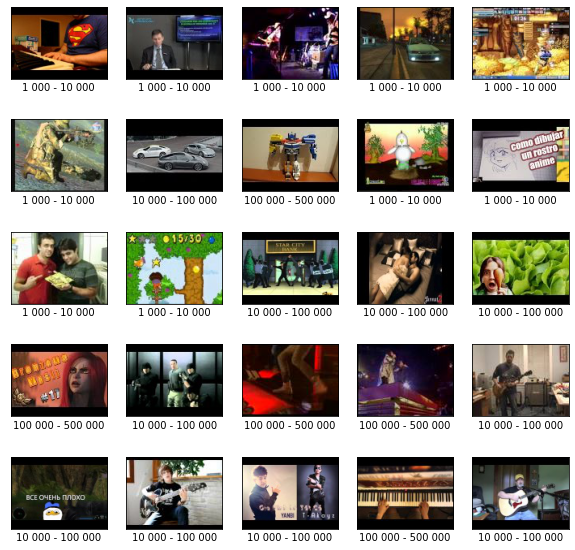

In [8]:
class_names = ['1 000 - 10 000', '10 000 - 100 000', '100 000 - 500 000', '500 000 - 1 000 000',
               'mas 1 000 000']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i])
    plt.xlabel(class_names[trainLabels[i]])
plt.show()

10 10 10 10 10


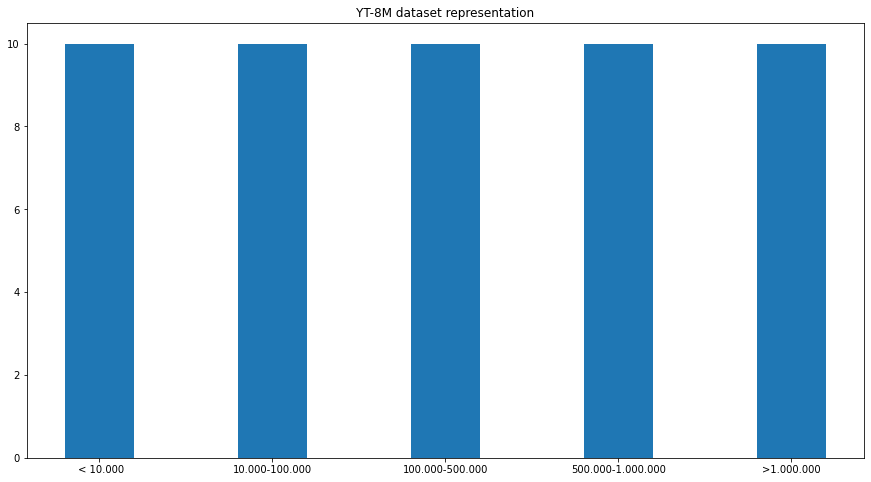

In [9]:
x_axis = [' < 10.000', '10.000-100.000', '100.000-500.000', '500.000-1.000.000',
               '>1.000.000']
y_axis = [trainLabels.count(0), trainLabels.count(1), trainLabels.count(2), trainLabels.count(3), trainLabels.count(4)]
print(y_axis[0],y_axis[1],y_axis[2],y_axis[3],y_axis[4])
plt.figure(figsize=(15,8)) 
plt.bar(x_axis, y_axis, width = 0.4,)
plt.title("YT-8M dataset representation")
plt.show()

In [10]:
#hay que pasar a one hot

trainLabels = keras.utils.to_categorical(trainLabels, 6)

In [ ]:
#print(trainImages.shape)
#print(trainImages[0].shape)

In [11]:
#Convertimos trainImages y valImages a ndarray, esto para poder usarlos despues
#ya que algunas funciones requieren que sean npdarray y no listas de python
#print(trainImages.shape)
#print(trainImages[0].shape)

trainImages = np.asarray(trainImages)
trainLabels = np.asarray(trainLabels)

#Y ahora que son ndarrays los normalizamos y expandemos la dim para que calze en
#la red
#trainImages[0]  = trainImages[0].astype("float32") / 255
print(trainImages.shape)
print(trainImages[0].shape)
trainImages = trainImages.astype("float32") / 255
#for i in range(len(trainImages)):
  #trainImages[i] = trainImages[i].astype("float32") / 255
  #print(i)

#trainImages = trainImages.astype("float32") / 255
#esto tira error, asique se convierte cada imagen, una a una
#trainImages = np.expand_dims(trainImages, -1)

print(trainImages.shape)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [ ]:
#hay que hacer un shuffle ahora
#import random



#c = list(zip(trainImages, trainLabels))

#random.shuffle(c)

#trainImages, trainLabels = zip(*c)


In [ ]:
print((trainLabels[:10]))

In [ ]:

simpleCNN = Sequential()
simpleCNN.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(90,120,3)))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
simpleCNN.add(Dropout(0.25))
simpleCNN.add(MaxPooling2D(pool_size=(2, 2)))
#
simpleCNN.add(Flatten())
simpleCNN.add(layers.Dense(64, activation='relu'))
simpleCNN.add(Dropout(0.35))
simpleCNN.add(layers.Dense(6, activation='sigmoid'))

#simpleCNN.add(layers.Dense(6, activation='sigmoid'))

In [ ]:
simpleCNN.summary()

In [ ]:
early_s_p = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", min_delta = 0.010, patience = 10, restore_best_weights=True)
#simpleCNN.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])
simpleCNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
history = simpleCNN.fit(trainImages, trainLabels, epochs=40, validation_split=0.2)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Accuracy and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')